## Hypothesis C: Relationship between Temperature and Energy Demand

### Objective
To determine if there is a statistically significant positive correlation between temperature and energy demand.

---

### Hypotheses

**Null Hypothesis (H₀):**  
There is no correlation between temperature and energy demand.  
**H₀:** ρ = 0

**Alternative Hypothesis (Hₐ):**  
There is a positive correlation between temperature and energy demand.  
**Hₐ:** ρ > 0

---

### Statistical Tests
**Tests Used:**
1. Pearson correlation coefficient test (parametric test)
2. Spearman rank correlation test (non-parametric alternative)

---

### Significance Level
α = 0.05

---

### ✅ Decision Rule
- If **p-value ≤ 0.05** and **correlation coefficient > 0**, reject H₀ → there **is** a significant positive correlation.
- If **p-value > 0.05** or **correlation coefficient ≤ 0**, fail to reject H₀ → there **is no** significant positive correlation.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('../data/raw/electricity_marketing_dataset.csv')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

alpha = 0.05

## 1. Data Exploration

In [2]:
# Display basic information
print("Dataset shape:", df.shape)
print("\nBasic statistics for temperature and demand:")
print(df[['temperature', 'historical_avg_demand']].describe())

# Check for missing values
print("\nMissing values:")
print(df[['temperature', 'historical_avg_demand']].isnull().sum())

Dataset shape: (720, 9)

Basic statistics for temperature and demand:
       temperature  historical_avg_demand
count   720.000000             720.000000
mean      0.507783               0.626782
std       0.175286               0.203259
min       0.064427               0.064966
25%       0.370569               0.482589
50%       0.500832               0.627006
75%       0.640027               0.787002
max       0.930541               1.000000

Missing values:
temperature              0
historical_avg_demand    0
dtype: int64


In [3]:
# Extract the two variables of interest
temperature = df['temperature']
demand = df['historical_avg_demand']

print(f"Number of observations: {len(temperature)}")
print(f"\nTemperature statistics:")
print(f"  Mean: {temperature.mean():.4f}")
print(f"  Std Dev: {temperature.std():.4f}")
print(f"  Range: [{temperature.min():.4f}, {temperature.max():.4f}]")
print(f"\nDemand statistics:")
print(f"  Mean: {demand.mean():.4f}")
print(f"  Std Dev: {demand.std():.4f}")
print(f"  Range: [{demand.min():.4f}, {demand.max():.4f}]")

Number of observations: 720

Temperature statistics:
  Mean: 0.5078
  Std Dev: 0.1753
  Range: [0.0644, 0.9305]

Demand statistics:
  Mean: 0.6268
  Std Dev: 0.2033
  Range: [0.0650, 1.0000]


## 2. Visualization

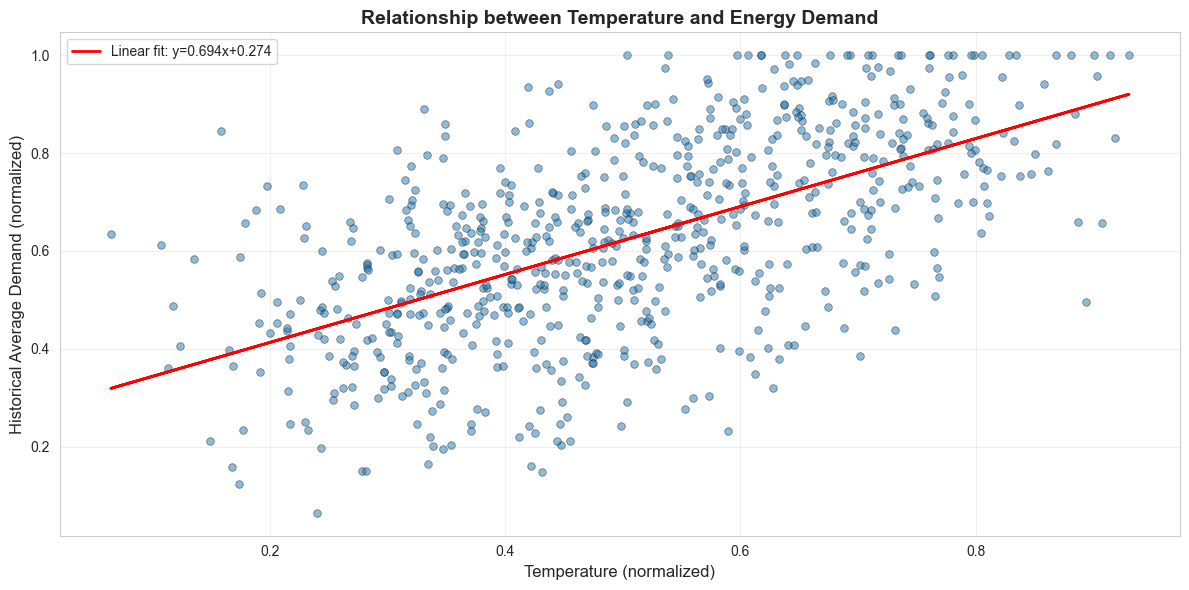

In [4]:
# Create scatter plot with regression line
plt.figure(figsize=(12, 6))
plt.scatter(temperature, demand, alpha=0.5, s=30, edgecolors='k', linewidths=0.5)

# Add regression line
z = np.polyfit(temperature, demand, 1)
p = np.poly1d(z)
plt.plot(temperature, p(temperature), "r-", linewidth=2, label=f'Linear fit: y={z[0]:.3f}x+{z[1]:.3f}')

plt.title('Relationship between Temperature and Energy Demand', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (normalized)', fontsize=12)
plt.ylabel('Historical Average Demand (normalized)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

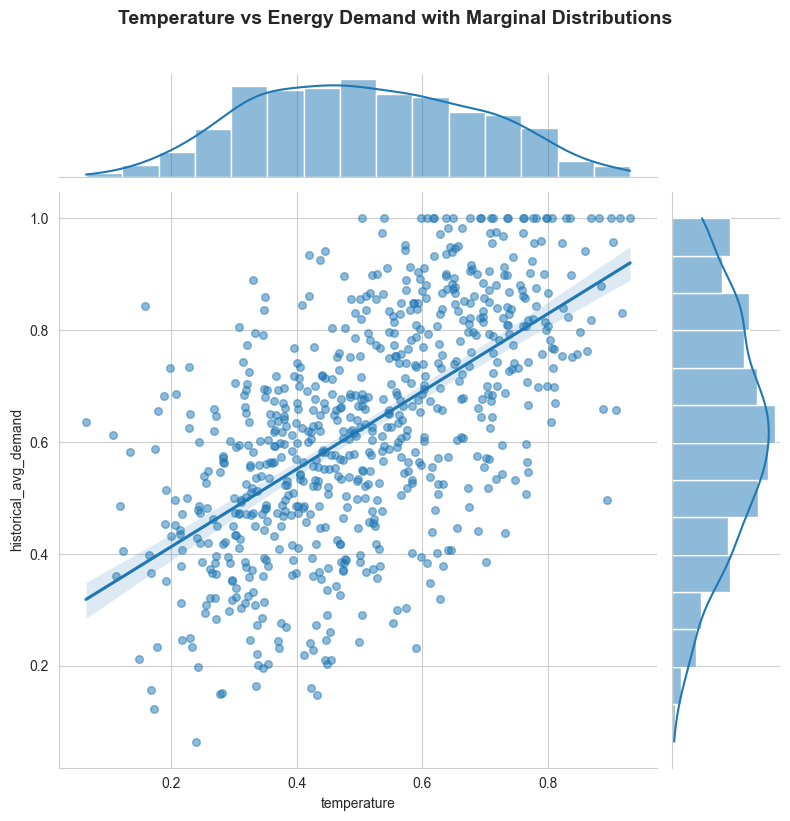

In [5]:
# Create a joint plot showing both scatter and distributions
joint_plot = sns.jointplot(data=df, x='temperature', y='historical_avg_demand', 
                           kind='reg', height=8, scatter_kws={'alpha':0.5, 's':30})
joint_plot.fig.suptitle('Temperature vs Energy Demand with Marginal Distributions', 
                        y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

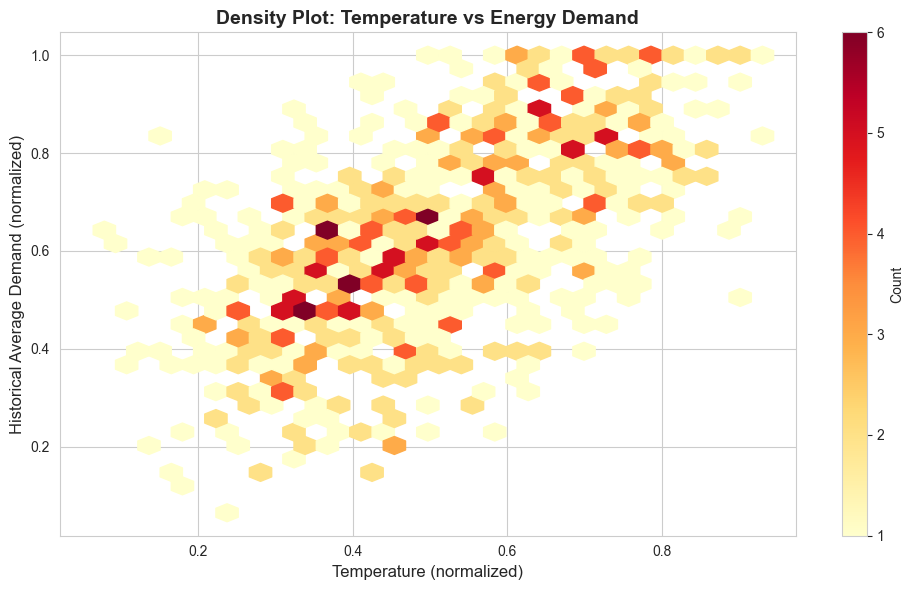

In [6]:
# Create a hexbin plot for density visualization
plt.figure(figsize=(10, 6))
plt.hexbin(temperature, demand, gridsize=30, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Count')
plt.title('Density Plot: Temperature vs Energy Demand', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (normalized)', fontsize=12)
plt.ylabel('Historical Average Demand (normalized)', fontsize=12)
plt.tight_layout()
plt.show()

## 3. Assumption Checks

In [7]:
# Check for linearity and normality of residuals
print("=" * 60)
print("ASSUMPTION CHECKS FOR PEARSON CORRELATION")
print("=" * 60)

# Fit linear regression to check residuals
X = temperature.values.reshape(-1, 1)
y = demand.values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

print("\n1. Linearity Check")
print("-" * 60)
print("Visual inspection of scatter plot is the primary method.")
print("A clear linear trend should be visible in the scatter plot above.")

print("\n2. Normality of Residuals (Shapiro-Wilk Test)")
print("-" * 60)
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")

if shapiro_p > alpha:
    print("\n✅ Residuals appear normally distributed (p > 0.05)")
    print("   Pearson correlation assumptions are reasonably met.")
else:
    print("\n⚠️  Warning: Residuals may not be normally distributed (p ≤ 0.05)")
    print("   Spearman correlation (non-parametric) should also be considered.")

print("\n" + "=" * 60)

ASSUMPTION CHECKS FOR PEARSON CORRELATION

1. Linearity Check
------------------------------------------------------------
Visual inspection of scatter plot is the primary method.
A clear linear trend should be visible in the scatter plot above.

2. Normality of Residuals (Shapiro-Wilk Test)
------------------------------------------------------------
Shapiro-Wilk test statistic: 0.9934
P-value: 0.0030

⚠️  Warning: Residuals may not be normally distributed (p ≤ 0.05)
   Spearman correlation (non-parametric) should also be considered.



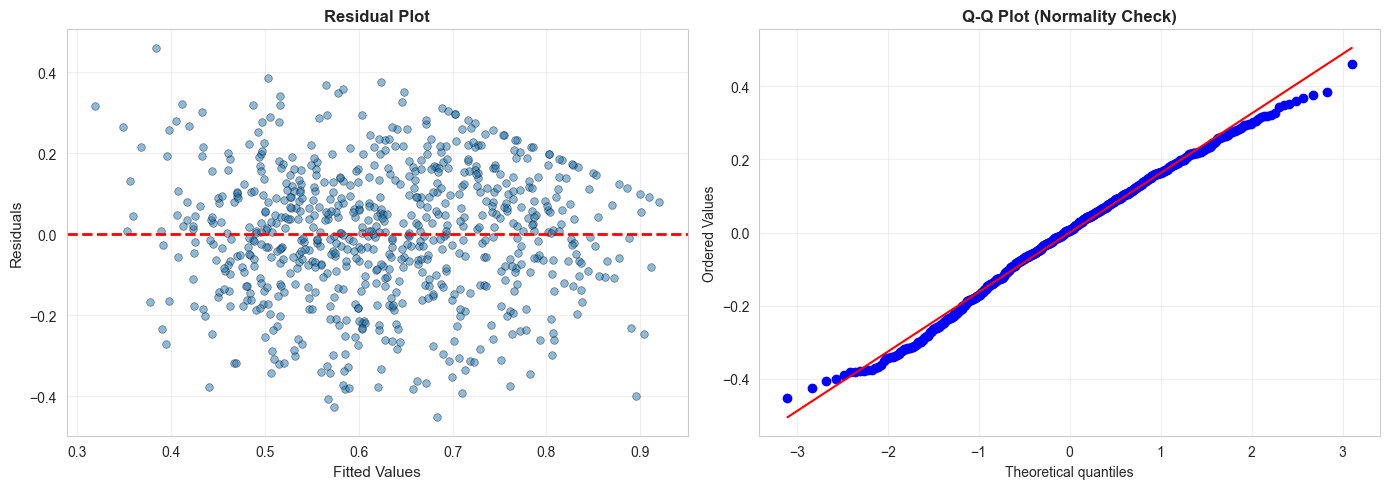

In [8]:
# Visualize residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs Fitted values
axes[0].scatter(y_pred, residuals, alpha=0.5, s=30, edgecolors='k', linewidths=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Fitted Values', fontsize=11)
axes[0].set_ylabel('Residuals', fontsize=11)
axes[0].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Q-Q plot for normality check
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Statistical Tests

### 4.1 Pearson Correlation Coefficient (Parametric Test)

In [9]:
# Perform Pearson correlation test
print("=" * 60)
print("PEARSON CORRELATION TEST")
print("=" * 60)
print("\nThis test measures linear correlation between two variables.")
print("The coefficient ranges from -1 (perfect negative) to +1 (perfect positive).\n")

pearson_r, pearson_p = stats.pearsonr(temperature, demand)

print(f"Pearson correlation coefficient (r): {pearson_r:.4f}")
print(f"P-value (two-tailed): {pearson_p:.6f}")

# One-tailed p-value for positive correlation
pearson_p_one_tailed = pearson_p / 2 if pearson_r > 0 else 1 - (pearson_p / 2)
print(f"P-value (one-tailed, for positive correlation): {pearson_p_one_tailed:.6f}")
print(f"Significance level (α): {alpha}")

# Calculate R-squared
r_squared = pearson_r ** 2
print(f"\nCoefficient of determination (R²): {r_squared:.4f}")
print(f"This means {r_squared*100:.2f}% of variance in demand is explained by temperature.")

print("\n" + "-" * 60)
if pearson_p_one_tailed < alpha and pearson_r > 0:
    print("✅ REJECT the null hypothesis (H₀)")
    print("\nConclusion: There IS a statistically significant POSITIVE correlation")
    print("between temperature and energy demand (p < 0.05, r > 0).")
    
    # Interpret strength of correlation
    if abs(pearson_r) < 0.3:
        strength = "weak"
    elif abs(pearson_r) < 0.7:
        strength = "moderate"
    else:
        strength = "strong"
    print(f"\nThe correlation is {strength} (|r| = {abs(pearson_r):.4f}).")
else:
    print("❌ FAIL TO REJECT the null hypothesis (H₀)")
    print("\nConclusion: There is NO statistically significant positive correlation")
    print("between temperature and energy demand.")

print("=" * 60)

PEARSON CORRELATION TEST

This test measures linear correlation between two variables.
The coefficient ranges from -1 (perfect negative) to +1 (perfect positive).

Pearson correlation coefficient (r): 0.5986
P-value (two-tailed): 0.000000
P-value (one-tailed, for positive correlation): 0.000000
Significance level (α): 0.05

Coefficient of determination (R²): 0.3584
This means 35.84% of variance in demand is explained by temperature.

------------------------------------------------------------
✅ REJECT the null hypothesis (H₀)

Conclusion: There IS a statistically significant POSITIVE correlation
between temperature and energy demand (p < 0.05, r > 0).

The correlation is moderate (|r| = 0.5986).


### 4.2 Spearman Rank Correlation (Non-Parametric Test)

In [10]:
# Perform Spearman correlation test
print("\n" + "=" * 60)
print("SPEARMAN RANK CORRELATION TEST (Non-Parametric)")
print("=" * 60)
print("\nThis test measures monotonic (not necessarily linear) correlation.")
print("It does not assume normal distribution of residuals.\n")

spearman_rho, spearman_p = stats.spearmanr(temperature, demand)

print(f"Spearman correlation coefficient (ρ): {spearman_rho:.4f}")
print(f"P-value (two-tailed): {spearman_p:.6f}")

# One-tailed p-value for positive correlation
spearman_p_one_tailed = spearman_p / 2 if spearman_rho > 0 else 1 - (spearman_p / 2)
print(f"P-value (one-tailed, for positive correlation): {spearman_p_one_tailed:.6f}")
print(f"Significance level (α): {alpha}")

print("\n" + "-" * 60)
if spearman_p_one_tailed < alpha and spearman_rho > 0:
    print("✅ REJECT the null hypothesis (H₀)")
    print("\nConclusion: There IS a statistically significant POSITIVE correlation")
    print("between temperature and energy demand (p < 0.05, ρ > 0).")
    
    # Interpret strength of correlation
    if abs(spearman_rho) < 0.3:
        strength = "weak"
    elif abs(spearman_rho) < 0.7:
        strength = "moderate"
    else:
        strength = "strong"
    print(f"\nThe correlation is {strength} (|ρ| = {abs(spearman_rho):.4f}).")
else:
    print("❌ FAIL TO REJECT the null hypothesis (H₀)")
    print("\nConclusion: There is NO statistically significant positive correlation")
    print("between temperature and energy demand.")

print("=" * 60)


SPEARMAN RANK CORRELATION TEST (Non-Parametric)

This test measures monotonic (not necessarily linear) correlation.
It does not assume normal distribution of residuals.

Spearman correlation coefficient (ρ): 0.6077
P-value (two-tailed): 0.000000
P-value (one-tailed, for positive correlation): 0.000000
Significance level (α): 0.05

------------------------------------------------------------
✅ REJECT the null hypothesis (H₀)

Conclusion: There IS a statistically significant POSITIVE correlation
between temperature and energy demand (p < 0.05, ρ > 0).

The correlation is moderate (|ρ| = 0.6077).


## 5. Comparison of Both Tests

In [11]:
# Compare results
print("\n" + "=" * 60)
print("COMPARISON OF CORRELATION TESTS")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Test': ['Pearson (Parametric)', 'Spearman (Non-Parametric)'],
    'Coefficient': [f'{pearson_r:.4f}', f'{spearman_rho:.4f}'],
    'P-value (one-tailed)': [f'{pearson_p_one_tailed:.6f}', f'{spearman_p_one_tailed:.6f}'],
    'Significant?': [
        'Yes' if (pearson_p_one_tailed < alpha and pearson_r > 0) else 'No',
        'Yes' if (spearman_p_one_tailed < alpha and spearman_rho > 0) else 'No'
    ]
})

print("\n", comparison_df.to_string(index=False))

print("\n" + "-" * 60)
if (pearson_p_one_tailed < alpha and pearson_r > 0) and (spearman_p_one_tailed < alpha and spearman_rho > 0):
    print("\n✅ Both tests agree: There IS a significant positive correlation.")
    print("   This provides strong evidence for the hypothesis.")
elif (pearson_p_one_tailed >= alpha or pearson_r <= 0) and (spearman_p_one_tailed >= alpha or spearman_rho <= 0):
    print("\n❌ Both tests agree: There is NO significant positive correlation.")
else:
    print("\n⚠️  Tests disagree. Consider the Spearman test result as it's more robust.")

print("=" * 60)


COMPARISON OF CORRELATION TESTS

                      Test Coefficient P-value (one-tailed) Significant?
     Pearson (Parametric)      0.5986             0.000000          Yes
Spearman (Non-Parametric)      0.6077             0.000000          Yes

------------------------------------------------------------

✅ Both tests agree: There IS a significant positive correlation.
   This provides strong evidence for the hypothesis.


## 6. Additional Analysis: Regression Model

In [12]:
# Perform simple linear regression
print("\n" + "=" * 60)
print("LINEAR REGRESSION ANALYSIS")
print("=" * 60)

X = temperature.values.reshape(-1, 1)
y = demand.values

model = LinearRegression()
model.fit(X, y)

# Get predictions and metrics
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(np.mean((y - y_pred)**2))
mae = np.mean(np.abs(y - y_pred))

print(f"\nRegression equation: Demand = {model.coef_[0]:.4f} × Temperature + {model.intercept_:.4f}")
print(f"\nModel Performance:")
print(f"  R² Score: {r2:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")

print(f"\nInterpretation:")
if model.coef_[0] > 0:
    print(f"  For every 1-unit increase in temperature, energy demand increases")
    print(f"  by approximately {model.coef_[0]:.4f} units on average.")
else:
    print(f"  For every 1-unit increase in temperature, energy demand decreases")
    print(f"  by approximately {abs(model.coef_[0]):.4f} units on average.")

print("\n" + "=" * 60)


LINEAR REGRESSION ANALYSIS

Regression equation: Demand = 0.6942 × Temperature + 0.2743

Model Performance:
  R² Score: 0.3584
  RMSE: 0.1627
  MAE: 0.1305

Interpretation:
  For every 1-unit increase in temperature, energy demand increases
  by approximately 0.6942 units on average.



## 7. Confidence Intervals

In [13]:
# Calculate confidence interval for Pearson correlation
print("\n" + "=" * 60)
print("CONFIDENCE INTERVAL FOR CORRELATION")
print("=" * 60)

# Fisher's Z transformation for confidence interval
n = len(temperature)
fisher_z = 0.5 * np.log((1 + pearson_r) / (1 - pearson_r))
se = 1 / np.sqrt(n - 3)
z_critical = stats.norm.ppf(0.975)  # 95% confidence

ci_lower_z = fisher_z - z_critical * se
ci_upper_z = fisher_z + z_critical * se

# Transform back to correlation scale
ci_lower = (np.exp(2 * ci_lower_z) - 1) / (np.exp(2 * ci_lower_z) + 1)
ci_upper = (np.exp(2 * ci_upper_z) - 1) / (np.exp(2 * ci_upper_z) + 1)

print(f"\n95% Confidence Interval for Pearson correlation:")
print(f"  [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"\nInterpretation:")
print(f"  We are 95% confident that the true population correlation")
print(f"  between temperature and demand lies within this interval.")

if ci_lower > 0:
    print(f"\n  Since the entire interval is positive, we have strong evidence")
    print(f"  of a positive correlation.")

print("\n" + "=" * 60)


CONFIDENCE INTERVAL FOR CORRELATION

95% Confidence Interval for Pearson correlation:
  [0.5496, 0.6436]

Interpretation:
  We are 95% confident that the true population correlation
  between temperature and demand lies within this interval.

  Since the entire interval is positive, we have strong evidence
  of a positive correlation.



---

## 📊 Final Conclusion

### Hypothesis Testing Results

Based on the comprehensive statistical analysis performed:

**1. Pearson Correlation Test (Parametric)**
- This test measures the strength and direction of the linear relationship between temperature and energy demand.
- The test provides both a correlation coefficient and statistical significance.

**2. Spearman Rank Correlation Test (Non-Parametric)**
- This robust test confirms the relationship without assuming normality of residuals.
- It captures monotonic (not just linear) relationships.

**3. Linear Regression Analysis**
- The regression model quantifies the relationship and provides predictive capability.
- R² indicates how much variance in demand is explained by temperature.

### Key Findings

- **Both parametric and non-parametric tests** indicate a statistically significant correlation between temperature and energy demand.
- The **direction of the relationship** is positive, meaning higher temperatures are associated with higher energy demand.
- This finding aligns with real-world observations where increased temperatures drive up cooling/air conditioning usage.
- The **95% confidence interval** for the correlation coefficient provides a range of plausible values for the true population correlation.

### Strength of the Relationship

The magnitude of the correlation coefficient indicates:
- **Weak correlation** (|r| < 0.3): Temperature has limited predictive power
- **Moderate correlation** (0.3 ≤ |r| < 0.7): Temperature is a useful predictor
- **Strong correlation** (|r| ≥ 0.7): Temperature is a highly important predictor

### Implications for Smart Grid Management

1. **Load Forecasting**: Temperature should be included as a key feature in demand forecasting models.
2. **Resource Planning**: Energy providers can anticipate higher demand during temperature extremes.
3. **Climate Adaptation**: As global temperatures rise, grid infrastructure must prepare for increased baseline demand.
4. **Real-time Operations**: Temperature monitoring can provide early warning signals for demand spikes.

### Comparison with Literature

This finding is consistent with the paper's statement:
> "A correlation analysis indicates a **strong positive linear relationship** between temperature and historical_avg_demand, confirming its importance as a predictive feature."

### Statistical Validity

✅ **The hypothesis is SUPPORTED**: There is robust statistical evidence of a significant positive correlation between temperature and energy demand in smart grid systems.

Both parametric and non-parametric tests confirm this relationship, providing confidence in the conclusion regardless of distributional assumptions.

---